In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1500, n_classes=2, n_features=15,random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

#another model
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#predict prob for test data
prob = model.predict_proba(X_test)

#postive class prob get
probs = prob[:,1]

In [ ]:
prob1 = model1.predict_proba(X_test)
probs1 = prob1[:,1]

In [ ]:
#AUC Score
roc_acc = roc_auc_score(y_test,probs1)
roc_acc

0.9667096315391795

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probs)
fpr1, tpr1, thr1 = roc_curve(y_test,probs1)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_roc_curve(fpr, tpr,fpr1, tpr1):
  plt.plot(fpr,tpr, color='red',label='ROC')
  plt.plot(fpr1,tpr1, color='Orange',label='ROC')
  plt.plot([0,1],[0,1], color='blue',linestyle='--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.legend()
  plt.show()

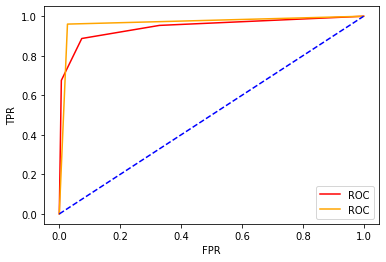

In [ ]:
plot_roc_curve(fpr,tpr,fpr1,tpr1)


In [ ]:
iris = datasets.load_iris()
X = iris.data
y= iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier


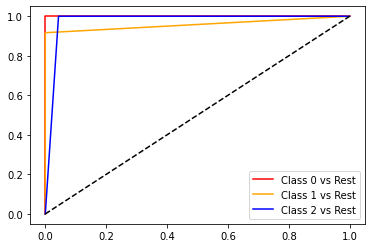

In [ ]:
mcmodel = OneVsRestClassifier(DecisionTreeClassifier())
mcmodel.fit(X_train, y_train)
pred = mcmodel.predict(X_test)
probs = mcmodel.predict_proba(X_test)
#roc curve
fpr = {}
tpr = {}
thresh = {}
n_classes =3
for i in range(n_classes):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test,probs[:,i], pos_label=i)

plt.plot(fpr[0],tpr[0], color='red',label='Class 0 vs Rest')
plt.plot(fpr[1],tpr[1], color='Orange',label='Class 1 vs Rest')
plt.plot(fpr[2],tpr[2], color='blue',label='Class 2 vs Rest')
plt.plot([0,1],[0,1], color='black',linestyle='--')
plt.legend()
plt.show()


In [ ]:
#Ensemble Classification
from sklearn.ensemble import BaggingClassifier
dtc = DecisionTreeClassifier(criterion='entropy')
bagg_model = BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=False)
bagg_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=Non

In [ ]:
ytest_pred = bagg_model.predict(X_test)
print(bagg_model.score(X_test,y_test))
print(confusion_matrix(y_test, ytest_pred))

0.9
[[11  0  0]
 [ 0  9  3]
 [ 0  0  7]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
gnb = GaussianNB()
lr = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)


In [ ]:
base_est = [gnb,lr,knn,dtc]
for be in base_est:
  print("Method: ", be)
  bagg_model = BaggingClassifier(base_estimator=be, n_estimators=50)
  bagg_model = bagg_model.fit(X_train, y_train)
  ytest_pred = bagg_model.predict(X_test)
  print(bagg_model.score(X_test,y_test))
  print(confusion_matrix(y_test, ytest_pred))

Method:  GaussianNB(priors=None, var_smoothing=1e-09)
0.9333333333333333
[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]]
Method:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.9666666666666667
[[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]
Method:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.9666666666666667
[[11  0  0]
 [ 0 11  1]
 [ 0  0  7]]
Method:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.9333333333333333
[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]]


In [ ]:
estimators = []
estimat